# Choose scenario (users' actions needed)

In [1]:
RCP = "RCP85" # either "RCP45" or "RCP85"

# Privode result file name

In [2]:
### Change the file names accordingly if you run the MCMC again on your computer and get new result files

In [3]:
SSB_result_file = 'results/Precomputed-EAS-{}-SSB(only-a-few-number-of-variables-are-stored-to-reduce-file-size)'.format(RCP)
Full_result_file = 'results/Precomputed-EAS-{}-Full(only-a-few-number-of-variables-are-stored-to-reduce-file-size)'.format(RCP)

# Import modules

In [4]:
import sys
import matplotlib.pyplot as plt
import seaborn as sns
monocolor = sns.cubehelix_palette(dark=0, light=1, as_cmap=True)
from numpy import ma 

sys.path.insert(0,"../src")
from tools import *

# Load coordinates

In [5]:
db = dbm.dumb.open('data/Coordinates','r')
my_shelf = shelve.Shelf(db)

eas_lon = my_shelf['eas_lon']
eas_lat = my_shelf['eas_lat']
ma = my_shelf['ma']

my_shelf.close()

index = np.where(~ma.mask.flatten())

# Calculate Multi-Model Mean

In [6]:
if RCP == "RCP45":
    db = dbm.dumb.open('data/EAS-RCP45')
else:
    db = dbm.dumb.open('data/EAS-RCP85')

EAS = shelve.Shelf(db)

MMM_H = np.zeros(216)
MMM_F = np.zeros(216)

for m in range(38):
    for r in range(EAS['RHm'][m]):
        MMM_H[index] += EAS['XHmr'][m,r,]
    for r in range(EAS['RFm'][m]):
        MMM_F[index] += EAS['XFmr'][m,r,]

MMM_H /= sum(EAS['RHm'])
MMM_F /= sum(EAS['RFm'])

MMM_H = MMM_H.reshape(12,-1)
MMM_F = MMM_F.reshape(12,-1)

MMM_H = np.ma.masked_where(ma.mask,MMM_H)
MMM_F = np.ma.masked_where(ma.mask,MMM_F)

db.close()

# Draw figures

In [7]:
db = dbm.dumb.open(Full_result_file,'r')
my_shelf = shelve.Shelf(db)

for key in list(my_shelf.keys()):
    globals()[key]=my_shelf[key]

db.close()

result_YH_mean = np.mean(result_YH,axis=0)
result_YF_mean = np.mean(result_YF,axis=0)
 
result_YH_std = np.std(result_YH,axis=0)
result_YF_std = np.std(result_YF,axis=0)

db = dbm.dumb.open(SSB_result_file,'r')
my_shelf = shelve.Shelf(db)

YH = my_shelf['result_YH']
YF = my_shelf['result_YF']

db.close()

result_YH_mean_SSB = np.mean(YH,axis=0)
result_YF_mean_SSB = np.mean(YF,axis=0)
 
result_YH_std_SSB = np.std(YH,axis=0)
result_YF_std_SSB = np.std(YF,axis=0)

## Comparison for the expected climate from different models

In [8]:
result_YH_mean_mat = np.zeros(eas_lat.shape[0]*eas_lon.shape[0])
result_YH_mean_mat[index] = result_YH_mean
result_YH_mean_mat = result_YH_mean_mat.reshape(eas_lat.shape[0],-1)
result_YH_mean_mat = np.ma.masked_where(ma.mask,result_YH_mean_mat)

result_YF_mean_mat = np.zeros(eas_lat.shape[0]*eas_lon.shape[0])
result_YF_mean_mat[index] = result_YF_mean
result_YF_mean_mat = result_YF_mean_mat.reshape(eas_lat.shape[0],-1)
result_YF_mean_mat = np.ma.masked_where(ma.mask,result_YF_mean_mat)

result_YH_mean_SSB_mat = np.zeros(eas_lat.shape[0]*eas_lon.shape[0])
result_YH_mean_SSB_mat[index] = result_YH_mean_SSB
result_YH_mean_SSB_mat = result_YH_mean_SSB_mat.reshape(eas_lat.shape[0],-1)
result_YH_mean_SSB_mat = np.ma.masked_where(ma.mask,result_YH_mean_SSB_mat)

result_YF_mean_SSB_mat = np.zeros(eas_lat.shape[0]*eas_lon.shape[0])
result_YF_mean_SSB_mat[index] = result_YF_mean_SSB
result_YF_mean_SSB_mat = result_YF_mean_SSB_mat.reshape(eas_lat.shape[0],-1)
result_YF_mean_SSB_mat = np.ma.masked_where(ma.mask,result_YF_mean_SSB_mat)

result_YH_std_mat = np.zeros(eas_lat.shape[0]*eas_lon.shape[0])
result_YH_std_mat[index] = result_YH_std
result_YH_std_mat = result_YH_std_mat.reshape(eas_lat.shape[0],-1)
result_YH_std_mat = np.ma.masked_where(ma.mask,result_YH_std_mat)

result_YF_std_mat = np.zeros(eas_lat.shape[0]*eas_lon.shape[0])
result_YF_std_mat[index] = result_YF_std
result_YF_std_mat = result_YF_std_mat.reshape(eas_lat.shape[0],-1)
result_YF_std_mat = np.ma.masked_where(ma.mask,result_YF_std_mat)

result_YH_std_SSB_mat = np.zeros(eas_lat.shape[0]*eas_lon.shape[0])
result_YH_std_SSB_mat[index] = result_YH_std_SSB
result_YH_std_SSB_mat = result_YH_std_SSB_mat.reshape(eas_lat.shape[0],-1)
result_YH_std_SSB_mat = np.ma.masked_where(ma.mask,result_YH_std_SSB_mat)

result_YF_std_SSB_mat = np.zeros(eas_lat.shape[0]*eas_lon.shape[0])
result_YF_std_SSB_mat[index] = result_YF_std_SSB
result_YF_std_SSB_mat = result_YF_std_SSB_mat.reshape(eas_lat.shape[0],-1)
result_YF_std_SSB_mat = np.ma.masked_where(ma.mask,result_YF_std_SSB_mat)

## Comparison for the expected climate from different models

In [9]:
cm = plt.cm.rainbow
cm.set_bad('gray',alpha=0.7)
RdBu_r = plt.cm.RdBu_r
RdBu_r.set_bad('gray',alpha=0.7)
Greens = plt.cm.Greens
Greens.set_bad('gray',alpha=0.7)

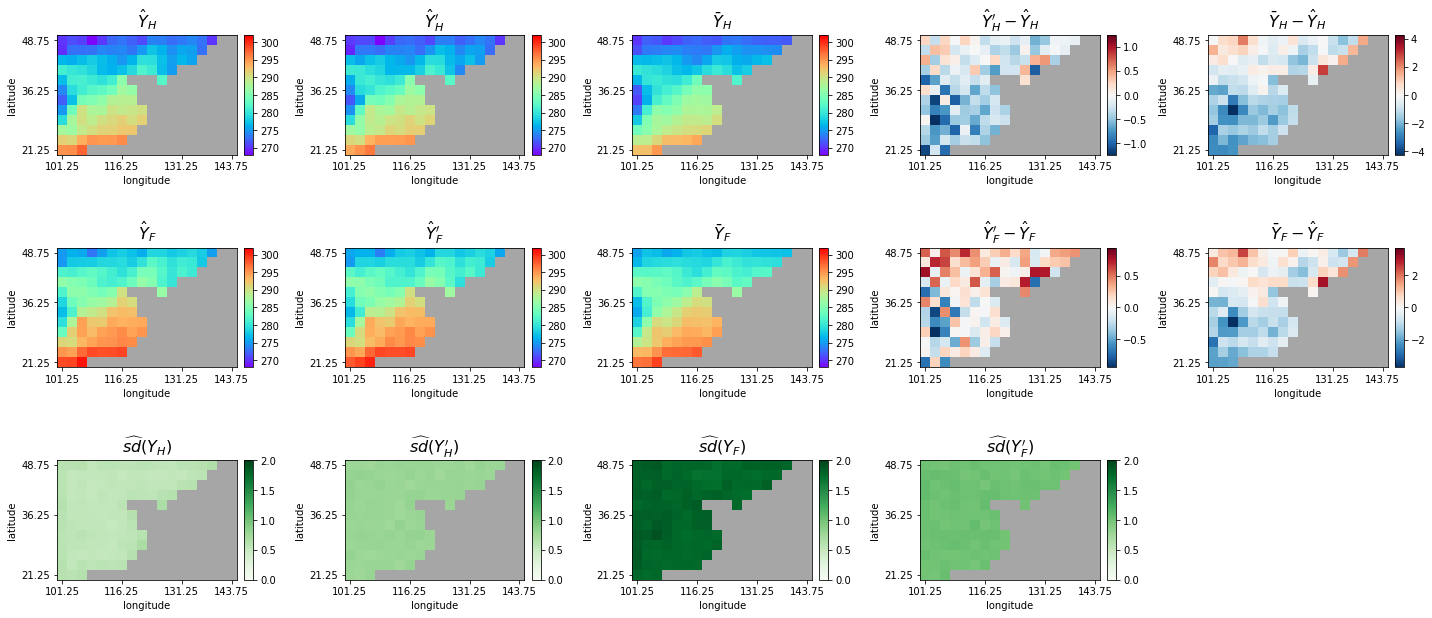

In [10]:
Hmin = 268
Fmax = 302

std_max = max(result_YH_std.max(),result_YH_std_SSB.max(),result_YF_std.max(),result_YF_std_SSB.max())*1.05

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import gridspec

fig, ax = plt.subplots(figsize=(20,9))
gridspec.GridSpec(3,5)

plt.subplot(351)
plt.imshow(result_YH_mean_mat,origin='lower',vmin = Hmin,vmax=Fmax, cmap = cm)
plt.xticks(np.array([0,6,12,17]),eas_lon[[0,6,12,17]])
plt.yticks(np.array([0,6,11]),eas_lat[[0,6,11]])
plt.title(r"$\hatY_H$",fontsize=16,y=1.02)
plt.xlabel("longitude")
plt.ylabel("latitude")
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(cax=cax,ticks=np.linspace(270,300,7))

plt.subplot(352)
plt.imshow(result_YH_mean_SSB_mat,origin='lower',vmin = Hmin,vmax=Fmax, cmap = cm)
plt.xticks(np.array([0,6,12,17]),eas_lon[[0,6,12,17]])
plt.yticks(np.array([0,6,11]),eas_lat[[0,6,11]])
plt.title(r"$\hatY^\prime_H$",fontsize=16,y=1.02)
plt.xlabel("longitude")
plt.ylabel("latitude")
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(cax=cax,ticks=np.linspace(270,300,7))

plt.subplot(353)
plt.imshow(MMM_H,origin='lower',vmin = Hmin,vmax=Fmax, cmap = cm)
plt.xticks(np.array([0,6,12,17]),eas_lon[[0,6,12,17]])
plt.yticks(np.array([0,6,11]),eas_lat[[0,6,11]])
plt.title(r"$\barY_H$",fontsize=16,y=1.02)
plt.xlabel("longitude")
plt.ylabel("latitude")
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(cax=cax,ticks=np.linspace(270,300,7))

plt.subplot(354)
rge1 = abs(result_YH_mean_mat-result_YH_mean_SSB_mat).max()
plt.imshow(result_YH_mean_SSB_mat-result_YH_mean_mat,origin='lower', cmap = plt.cm.RdBu_r, vmin = -rge1, vmax = rge1)
plt.xticks(np.array([0,6,12,17]),eas_lon[[0,6,12,17]])
plt.yticks(np.array([0,6,11]),eas_lat[[0,6,11]])
plt.title(r"$\hatY^\prime_H-\hatY_H$",fontsize=16,y=1.02)
plt.xlabel("longitude")
plt.ylabel("latitude")
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(cax=cax)

plt.subplot(355)
rge2 = abs(result_YH_mean_mat-MMM_H).max()
plt.imshow(MMM_H-result_YH_mean_mat,origin='lower', cmap = plt.cm.RdBu_r, vmin = -rge2, vmax = rge2)
plt.xticks(np.array([0,6,12,17]),eas_lon[[0,6,12,17]])
plt.yticks(np.array([0,6,11]),eas_lat[[0,6,11]])
plt.title(r"$\barY_H-\hatY_H$",fontsize=16,y=1.02)
plt.xlabel("longitude")
plt.ylabel("latitude")
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(cax=cax)

plt.subplot(356)
plt.imshow(result_YF_mean_mat,origin='lower',vmin = Hmin,vmax=Fmax, cmap = cm)
plt.xticks(np.array([0,6,12,17]),eas_lon[[0,6,12,17]])
plt.yticks(np.array([0,6,11]),eas_lat[[0,6,11]])
plt.title(r"$\hatY_F$",fontsize=16,y=1.02)
plt.xlabel("longitude")
plt.ylabel("latitude")
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(cax=cax,ticks=np.linspace(270,300,7))

plt.subplot(357)
plt.imshow(result_YF_mean_SSB_mat,origin='lower', cmap = cm,vmin = Hmin,vmax=Fmax)
plt.xticks(np.array([0,6,12,17]),eas_lon[[0,6,12,17]])
plt.yticks(np.array([0,6,11]),eas_lat[[0,6,11]])
plt.title(r"$\hatY^\prime_F$",fontsize=16,y=1.02)
plt.xlabel("longitude")
plt.ylabel("latitude")
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(cax=cax,ticks=np.linspace(270,300,7))

plt.subplot(358)
plt.imshow(MMM_F,origin='lower',vmin = Hmin,vmax=Fmax, cmap = cm)
plt.xticks(np.array([0,6,12,17]),eas_lon[[0,6,12,17]])
plt.yticks(np.array([0,6,11]),eas_lat[[0,6,11]])
plt.title(r"$\barY_F$",fontsize=16,y=1.02)
plt.xlabel("longitude")
plt.ylabel("latitude")
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(cax=cax,ticks=np.linspace(270,300,7))

plt.subplot(359)
rge3 = abs(result_YF_mean_mat-result_YF_mean_SSB_mat).max()
plt.imshow(result_YF_mean_SSB_mat-result_YF_mean_mat,origin='lower', cmap = plt.cm.RdBu_r, vmin = -rge3, vmax = rge3)
plt.xticks(np.array([0,6,12,17]),eas_lon[[0,6,12,17]])
plt.yticks(np.array([0,6,11]),eas_lat[[0,6,11]])
plt.title(r"$\hatY^\prime_F-\hatY_F$",fontsize=16,y=1.02)
plt.xlabel("longitude")
plt.ylabel("latitude")
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(cax=cax)

plt.subplot2grid((3,5),(1,4))
rge4 = abs(result_YF_mean_mat-MMM_F).max()
plt.imshow(MMM_F-result_YF_mean_mat,origin='lower', cmap = plt.cm.RdBu_r, vmin = -rge4, vmax = rge4)
plt.xticks(np.array([0,6,12,17]),eas_lon[[0,6,12,17]])
plt.yticks(np.array([0,6,11]),eas_lat[[0,6,11]])
plt.title(r"$\barY_F-\hatY_F$",fontsize=16,y=1.02)
plt.xlabel("longitude")
plt.ylabel("latitude")
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(cax=cax)

plt.subplot2grid((3,5),(2,0))
plt.imshow(result_YH_std_mat,origin='lower', cmap = Greens, vmin = 0, vmax = std_max)
plt.xticks(np.array([0,6,12,17]),eas_lon[[0,6,12,17]])
plt.yticks(np.array([0,6,11]),eas_lat[[0,6,11]])
plt.title(r"$\widehat{sd}(Y_H)$",fontsize=16,y=1.02)
plt.xlabel("longitude")
plt.ylabel("latitude")
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(cax=cax)

plt.subplot2grid((3,5),(2,1))
plt.imshow(result_YH_std_SSB_mat,origin='lower', cmap = Greens, vmin = 0, vmax = std_max)
plt.xticks(np.array([0,6,12,17]),eas_lon[[0,6,12,17]])
plt.yticks(np.array([0,6,11]),eas_lat[[0,6,11]])
plt.title(r"$\widehat{sd}(Y^\prime_H)$",fontsize=16,y=1.02)
plt.xlabel("longitude")
plt.ylabel("latitude")
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(cax=cax)


plt.subplot2grid((3,5),(2,2))
plt.imshow(result_YF_std_mat,origin='lower', cmap = Greens, vmin = 0, vmax = std_max)
plt.xticks(np.array([0,6,12,17]),eas_lon[[0,6,12,17]])
plt.yticks(np.array([0,6,11]),eas_lat[[0,6,11]])
plt.title(r"$\widehat{sd}(Y_F)$",fontsize=16,y=1.02)
plt.xlabel("longitude")
plt.ylabel("latitude")
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(cax=cax)

plt.subplot2grid((3,5),(2,3))
plt.imshow(result_YF_std_SSB_mat,origin='lower', cmap = Greens, vmin = 0, vmax = std_max)
plt.xticks(np.array([0,6,12,17]),eas_lon[[0,6,12,17]])
plt.yticks(np.array([0,6,11]),eas_lat[[0,6,11]])
plt.title(r"$\widehat{sd}(Y^\prime_F)$",fontsize=16,y=1.02)
plt.xlabel("longitude")
plt.ylabel("latitude")
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(cax=cax)

plt.tight_layout()

## Some MCMC traceplots from the Full model

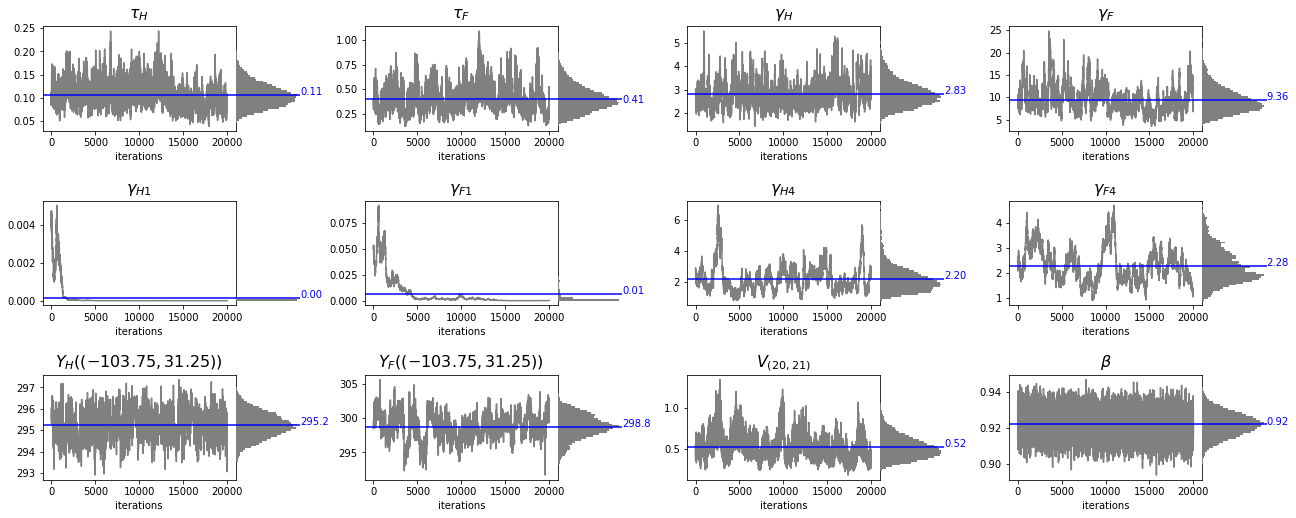

In [11]:
result_YH_one = result_YH[:,0]
result_YF_one = result_YF[:,0]

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,7))
plt.subplots_adjust(left=0.1, right=0.95, bottom = 0.05, top = 0.95)
plt.subplots_adjust(wspace=0, hspace=100)

gridspec.GridSpec(14,19)

# Tau_H
plt.subplot2grid((14,19), (0,0), colspan=3, rowspan=4)
plt.plot(result_tauH,color='grey')
plt.title(r"$\tau_H$",fontsize=16,y=1.02)
plt.xlabel("iterations")
plt.axhline(np.mean(result_tauH),color='blue')
top, bottom = plt.ylim()

plt.subplot2grid((14,19), (0,3), colspan=1, rowspan=4)
plt.ylim(top,bottom)
plt.hist(result_tauH,bins=50,orientation="horizontal",color='grey')
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.axhline(np.mean(result_tauH),color='blue')
_, right = plt.xlim()
plt.text(right,np.mean(result_tauH),"{:.2f}".format(np.mean(result_tauH)),color='blue')

# Tau_F
plt.subplot2grid((14,19), (0,5), colspan=3, rowspan=4)
plt.plot(result_tauF,color='grey')
plt.title(r"$\tau_F$",fontsize=16,y=1.02)
plt.xlabel("iterations")
plt.axhline(np.mean(result_tauF),color='blue')
top, bottom = plt.ylim()

plt.subplot2grid((14,19), (0,8), colspan=1, rowspan=4)
plt.ylim(top,bottom)
plt.hist(result_tauF,bins=50,orientation="horizontal",color='grey')
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.axhline(np.mean(result_tauF),color='blue')
_, right = plt.xlim()
plt.text(right,np.mean(result_tauF)-0.04,round(np.mean(result_tauF),2),color='blue')


# Gamma_H
plt.subplot2grid((14,19), (0,10), colspan=3, rowspan=4)
plt.plot(result_gammaH,color='grey')
plt.title(r"$\gamma_H$",fontsize=16,y=1.02)
plt.xlabel("iterations")
plt.axhline(np.mean(result_gammaH),color='blue')
top, bottom = plt.ylim()

plt.subplot2grid((14,19), (0,13), colspan=1, rowspan=4)
plt.ylim(top,bottom)
plt.hist(result_gammaH,bins=50,orientation="horizontal",color='grey')
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.axhline(np.mean(result_gammaH),color='blue')
_, right = plt.xlim()
plt.text(right,np.mean(result_gammaH),round(np.mean(result_gammaH),2),color='blue')

# Gamma_F
plt.subplot2grid((14,19), (0,15), colspan=3, rowspan=4)
plt.plot(result_gammaF,color='grey')
plt.title(r"$\gamma_F$",fontsize=16,y=1.02)
plt.xlabel("iterations")
plt.axhline(np.mean(result_gammaF),color='blue')
top, bottom = plt.ylim()

plt.subplot2grid((14,19), (0,18), colspan=1, rowspan=4)
plt.ylim(top,bottom)
plt.hist(result_gammaF,bins=50,orientation="horizontal",color='grey')
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.axhline(np.mean(result_gammaF),color='blue')
_, right = plt.xlim()
plt.text(right,np.mean(result_gammaF),round(np.mean(result_gammaF),2),color='blue')

#-----------------
#-----------------
#-----------------

# Gamma_H1
plt.subplot2grid((14,19), (5,0), colspan=3, rowspan=4)
plt.plot(result_gammaHm[:,0],color='grey')
plt.title(r"$\gamma_{H1}$",fontsize=16,y=1.02)
plt.xlabel("iterations")
plt.axhline(np.mean(result_gammaHm[:,0]),color='blue')
top, bottom = plt.ylim()

plt.subplot2grid((14,19), (5,3), colspan=1, rowspan=4)
plt.ylim(top,bottom)
plt.hist(result_gammaHm[:,0],bins=50,orientation="horizontal",color='grey')
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.axhline(np.mean(result_gammaHm[:,0]),color='blue')
_, right = plt.xlim()
plt.text(right,np.mean(result_gammaHm[:,0]),"{:.2f}".format(np.mean(result_gammaHm[:,0])),color='blue')

# Gamma_F1
plt.subplot2grid((14,19), (5,5), colspan=3, rowspan=4)
plt.plot(result_gammaFm[:,0],color='grey')
plt.title(r"$\gamma_{F1}$",fontsize=16,y=1.02)
plt.xlabel("iterations")
plt.axhline(np.mean(result_gammaFm[:,0]),color='blue')
top, bottom = plt.ylim()

plt.subplot2grid((14,19), (5,8), colspan=1, rowspan=4)
plt.ylim(top,bottom)
plt.hist(result_gammaFm[:,0],bins=50,orientation="horizontal",color='grey')
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.axhline(np.mean(result_gammaFm[:,0]),color='blue')
_, right = plt.xlim()
plt.text(right,np.mean(result_gammaFm[:,0]),"{:.2f}".format(np.mean(result_gammaFm[:,0])),color='blue')


# Gamma_H4
plt.subplot2grid((14,19), (5,10), colspan=3, rowspan=4)
plt.plot(result_gammaHm[:,3],color='grey')
plt.title(r"$\gamma_{H4}$",fontsize=16,y=1.02)
plt.xlabel("iterations")
plt.axhline(np.mean(result_gammaHm[:,3]),color='blue')
top, bottom = plt.ylim()

plt.subplot2grid((14,19), (5,13), colspan=1, rowspan=4)
plt.ylim(top,bottom)
plt.hist(result_gammaHm[:,3],bins=50,orientation="horizontal",color='grey')
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.axhline(np.mean(result_gammaHm[:,3]),color='blue')
_, right = plt.xlim()
plt.text(right,np.mean(result_gammaHm[:,3]),"{:.2f}".format(np.mean(result_gammaHm[:,3])),color='blue')

# Gamma_F4
plt.subplot2grid((14,19), (5,15), colspan=3, rowspan=4)
plt.plot(result_gammaFm[:,3],color='grey')
plt.title(r"$\gamma_{F4}$",fontsize=16,y=1.02)
plt.xlabel("iterations")
plt.axhline(np.mean(result_gammaFm[:,3]),color='blue')
top, bottom = plt.ylim()

plt.subplot2grid((14,19), (5,18), colspan=1, rowspan=4)
plt.ylim(top,bottom)
plt.hist(result_gammaFm[:,3],bins=50,orientation="horizontal",color='grey')
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.axhline(np.mean(result_gammaFm[:,3]),color='blue')
_, right = plt.xlim()
plt.text(right,np.mean(result_gammaFm[:,3]),"{:.2f}".format(np.mean(result_gammaFm[:,3])),color='blue')

# -----------------------------
# -----------------------------

# Y_H
plt.subplot2grid((14,19), (10,0), colspan=3, rowspan=4)
plt.plot(result_YH_one,color='grey')
plt.title(r"$Y_H((-103.75,31.25))$",fontsize=16,y=1.02)
plt.xlabel("iterations")
plt.axhline(np.mean(result_YH_one),color='blue')
top, bottom = plt.ylim()

plt.subplot2grid((14,19), (10,3), colspan=1, rowspan=4)
plt.ylim(top,bottom)
plt.hist(result_YH_one,bins=50,orientation="horizontal",color='grey')
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.axhline(np.mean(result_YH_one),color='blue')
_, right = plt.xlim()
plt.text(right,np.mean(result_YH_one),round(np.mean(result_YH_one),1),color='blue')

# Y_F
plt.subplot2grid((14,19), (10,5), colspan=3, rowspan=4)
plt.plot(result_YF_one,color='grey')
plt.title(r"$Y_F((-103.75,31.25))$",fontsize=16,y=1.02)
plt.xlabel("iterations")
plt.axhline(np.mean(result_YF_one),color='blue')
top, bottom = plt.ylim()

plt.subplot2grid((14,19), (10,8), colspan=1, rowspan=4)
plt.ylim(top,bottom)
plt.hist(result_YF_one,bins=50,orientation="horizontal",color='grey')
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.axhline(np.mean(result_YF_one),color='blue')
_, right = plt.xlim()
plt.text(right,np.mean(result_YF_one),round(np.mean(result_YF_one),1),color='blue')

# V
plt.subplot2grid((14,19), (10,10), colspan=3, rowspan=4)
plt.plot(result_V_one,color='grey')
plt.title(r"$V_{(20,21)}$",fontsize=16,y=1.02)
plt.xlabel("iterations")
plt.axhline(np.mean(result_V_one),color='blue')
top, bottom = plt.ylim()

plt.subplot2grid((14,19), (10,13), colspan=1, rowspan=4)
plt.ylim(top,bottom)
plt.hist(result_V_one,bins=50,orientation="horizontal",color='grey')
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.axhline(np.mean(result_V_one),color='blue')
_, right = plt.xlim()
plt.text(right,np.mean(result_V_one),round(np.mean(result_V_one),2),color='blue')


# Beta
plt.subplot2grid((14,19), (10,15), colspan=3, rowspan=4)
plt.plot(result_beta,color='grey')
plt.title(r"$\beta$",fontsize=16,y=1.02)
plt.xlabel("iterations")
plt.axhline(np.mean(result_beta),color='blue')
top, bottom = plt.ylim()

plt.subplot2grid((14,19), (10,18), colspan=1, rowspan=4)
plt.ylim(top,bottom)
plt.hist(result_beta,bins=50,orientation="horizontal",color='grey')
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.axhline(np.mean(result_beta),color='blue')
_, right = plt.xlim()
plt.text(right,np.mean(result_beta),round(np.mean(result_beta),2),color='blue');